___

QTW Case 6

#### Rick Fontenot
___


In [1]:
# Imports
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from datetime import date
import sklearn
pd.set_option("display.max_columns", None, "display.max_rows", None)
import missingno as msno


### Load the raw data


In [2]:
higgs=pd.read_csv("/Users/rickfontenot/Dropbox/SMU/DS7333 Quantifying World/QTW_Github/QTW/Case Study 6/data/all_train.csv")

higgs.head()

,# label,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,mass
0,1.0,-0.346368,0.416306,0.999236,0.475342,0.427493,-0.005984,1.989833,0.344530,1.566297,0.754261,2.269852,-1.300984,-1.199420,-1.161915,3.357043,0.460796,-0.404118,-0.815440,4.105282,0.267826,0.378718,1.743123,3.406367,4.350537,-0.352571,1.130032,2.227706,1000.0
1,1.0,1.708236,-0.319394,-1.241873,-0.887231,-0.871906,-0.005984,-0.001047,-1.038225,0.655748,0.754261,0.459217,-0.695640,0.359856,-1.161915,-0.502048,0.505149,-1.500441,1.226331,-1.178141,-0.877361,-1.483769,-0.573682,-1.693781,-0.545062,-0.299118,-0.662942,-0.193019,750.0
2,0.0,-0.360693,1.794174,0.264738,-0.472273,-0.292344,-1.054221,-1.150495,1.423404,1.270098,0.754261,-1.031239,1.912465,-1.321417,-1.161915,-0.406757,1.346497,-0.298099,1.226331,-1.199511,0.539020,-1.590629,-0.573682,-0.543636,-0.937456,-0.300344,-0.523262,-1.506304,750.0
3,1.0,-0.377914,-0.103932,-0.649434,-2.125015,-1.643797,-0.005984,1.011112,-1.040340,-0.541991,0.754261,1.142262,0.551081,1.016731,0.860649,0.454005,0.624624,1.439072,-0.815440,0.463763,-0.006583,1.089122,-0.573682,-0.276348,-0.409272,-0.349926,-0.307123,0.529698,1250.0
4,0.0,-0.067436,-0.636762,-0.620166,-0.062551,1.588715,-0.005984,-0.595304,-1.238987,0.336844,-1.325801,-0.181512,-1.329374,0.879087,0.860649,-0.143564,-1.293935,-1.222800,-0.815440,-0.552837,-1.418494,-0.562982,1.743123,0.881802,0.002516,1.560950,-0.150760,-1.023889,750.0


In [3]:
higgs.shape

(7000000, 29)

In [4]:
higgs.columns

Index(['# label', 'f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9',
       'f10', 'f11', 'f12', 'f13', 'f14', 'f15', 'f16', 'f17', 'f18', 'f19',
       'f20', 'f21', 'f22', 'f23', 'f24', 'f25', 'f26', 'mass'],
      dtype='object')

In [5]:
higgs = higgs.rename(columns={higgs.columns[0]: 'label'})
higgs['label'] = higgs['label'].apply(lambda x: round(x,))
higgs.head()

,label,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,mass
0,1,-0.346368,0.416306,0.999236,0.475342,0.427493,-0.005984,1.989833,0.344530,1.566297,0.754261,2.269852,-1.300984,-1.199420,-1.161915,3.357043,0.460796,-0.404118,-0.815440,4.105282,0.267826,0.378718,1.743123,3.406367,4.350537,-0.352571,1.130032,2.227706,1000.0
1,1,1.708236,-0.319394,-1.241873,-0.887231,-0.871906,-0.005984,-0.001047,-1.038225,0.655748,0.754261,0.459217,-0.695640,0.359856,-1.161915,-0.502048,0.505149,-1.500441,1.226331,-1.178141,-0.877361,-1.483769,-0.573682,-1.693781,-0.545062,-0.299118,-0.662942,-0.193019,750.0
2,0,-0.360693,1.794174,0.264738,-0.472273,-0.292344,-1.054221,-1.150495,1.423404,1.270098,0.754261,-1.031239,1.912465,-1.321417,-1.161915,-0.406757,1.346497,-0.298099,1.226331,-1.199511,0.539020,-1.590629,-0.573682,-0.543636,-0.937456,-0.300344,-0.523262,-1.506304,750.0
3,1,-0.377914,-0.103932,-0.649434,-2.125015,-1.643797,-0.005984,1.011112,-1.040340,-0.541991,0.754261,1.142262,0.551081,1.016731,0.860649,0.454005,0.624624,1.439072,-0.815440,0.463763,-0.006583,1.089122,-0.573682,-0.276348,-0.409272,-0.349926,-0.307123,0.529698,1250.0
4,0,-0.067436,-0.636762,-0.620166,-0.062551,1.588715,-0.005984,-0.595304,-1.238987,0.336844,-1.325801,-0.181512,-1.329374,0.879087,0.860649,-0.143564,-1.293935,-1.222800,-0.815440,-0.552837,-1.418494,-0.562982,1.743123,0.881802,0.002516,1.560950,-0.150760,-1.023889,750.0


# 7 million records with 28 features plus target, and no missing values or duplicates

In [6]:
higgs.isna().sum()

label    0
f0       0
f1       0
f2       0
f3       0
f4       0
f5       0
f6       0
f7       0
f8       0
f9       0
f10      0
f11      0
f12      0
f13      0
f14      0
f15      0
f16      0
f17      0
f18      0
f19      0
f20      0
f21      0
f22      0
f23      0
f24      0
f25      0
f26      0
mass     0
dtype: int64

In [7]:
# Check for duplicate rows
print('Duplicate rows: ',higgs.duplicated(keep='first').sum())

Duplicate rows:  0


/var/folders/9j/md1p5ld92510j4f_fk49qf300000gn/T/ipykernel_1473/855766858.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


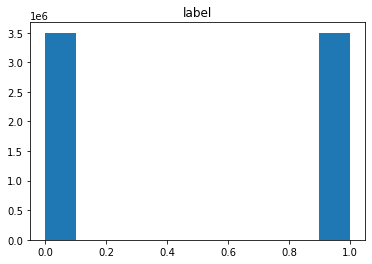

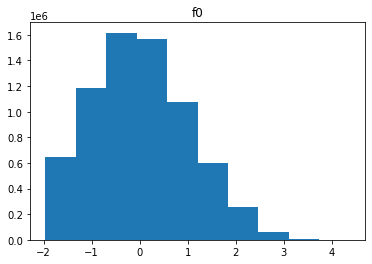

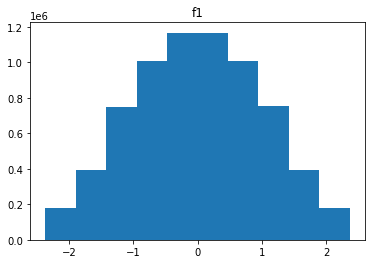

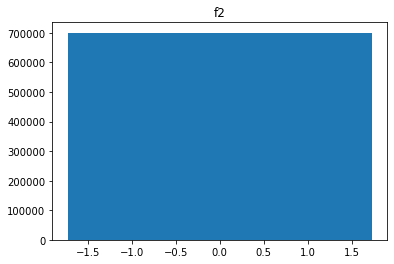

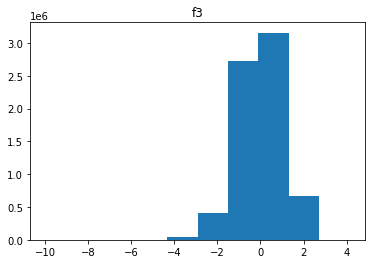

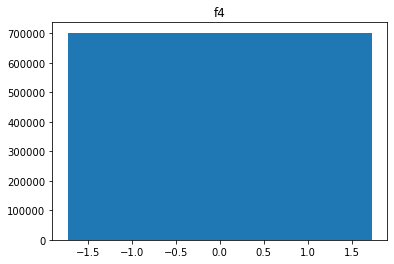

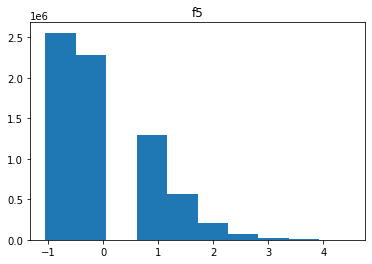

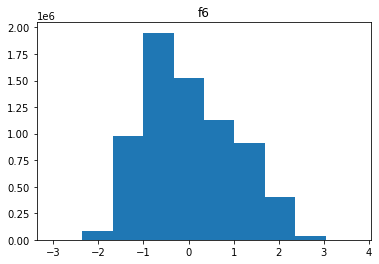

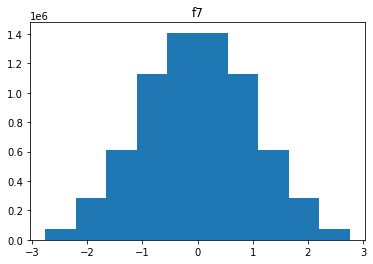

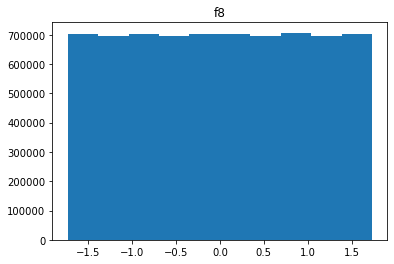

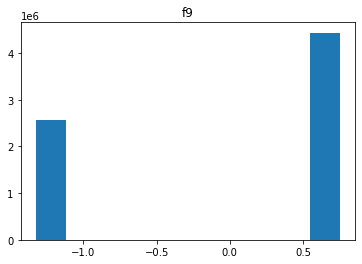

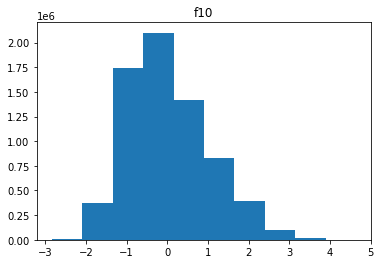

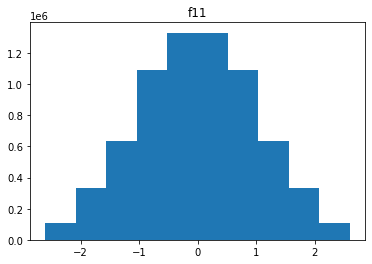

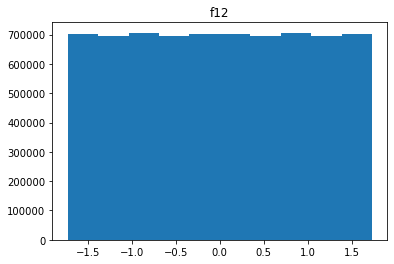

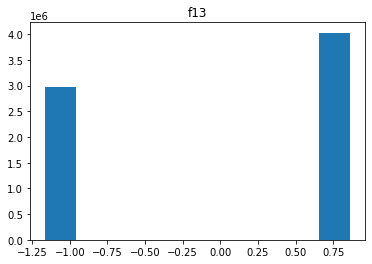

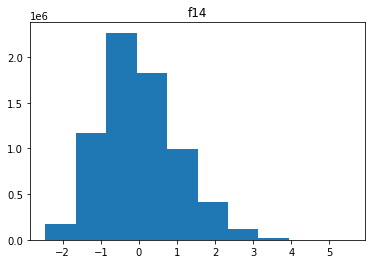

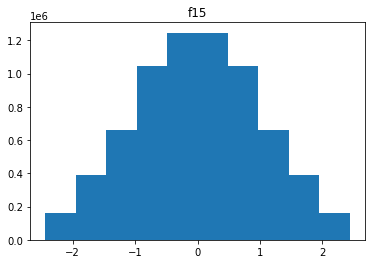

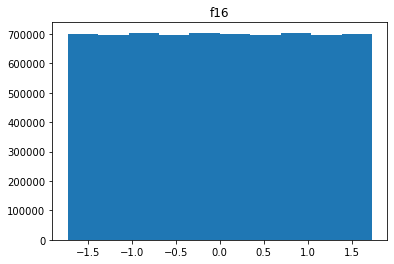

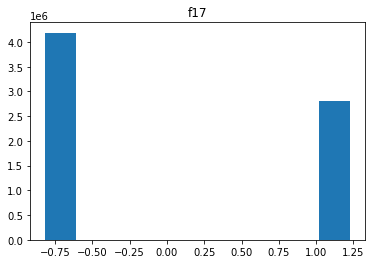

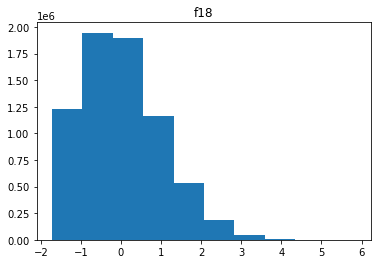

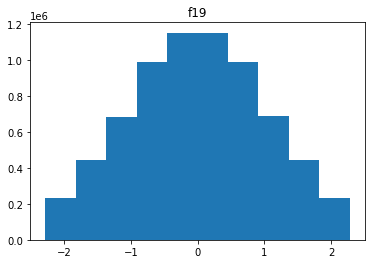

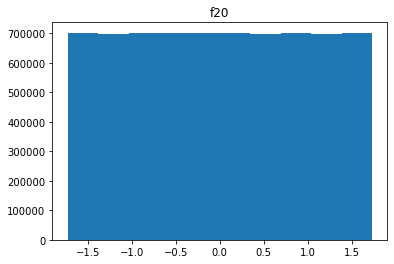

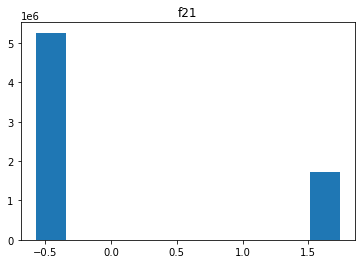

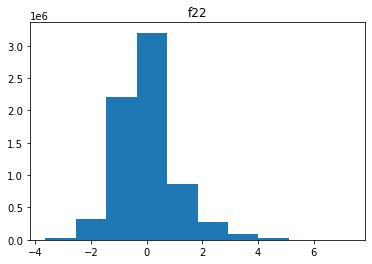

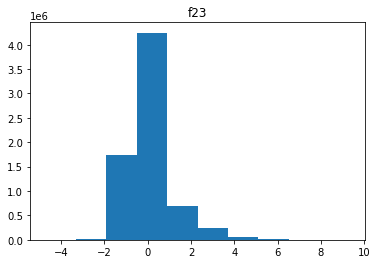

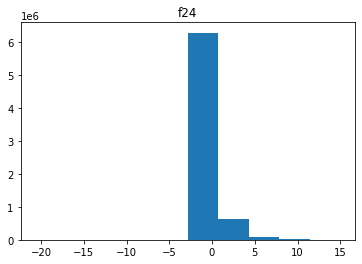

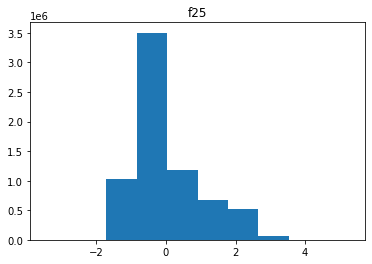

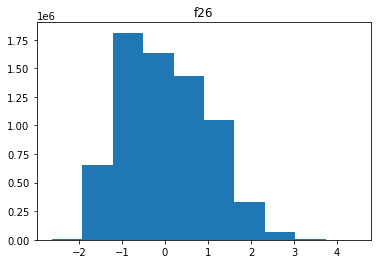

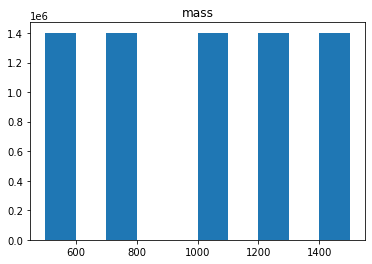

In [8]:
for i in higgs.columns:    
    plt.figure()
    plt.title(f'{i}')
    plt.hist(higgs[i])

In [9]:
higgs.describe()

,label,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,mass
count,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06
mean,5.001256e-01,1.612528e-02,4.770022e-04,2.686578e-05,1.056081e-02,-1.050026e-04,2.765919e-03,1.815953e-02,2.510948e-05,4.345870e-04,-6.869956e-03,1.754267e-02,-1.610605e-04,-3.289412e-04,1.738506e-03,1.724634e-02,4.830252e-04,-5.536178e-04,4.960189e-03,1.164789e-02,-1.127097e-04,7.686731e-05,2.909202e-04,1.228774e-02,9.778378e-03,5.269844e-03,-1.760961e-03,1.533136e-02,1.000107e+03
std,5.000000e-01,1.004417e+00,9.974864e-01,1.000080e+00,9.956003e-01,9.998670e-01,1.000957e+00,9.867746e-01,9.965867e-01,1.000007e+00,1.001938e+00,9.941511e-01,9.984497e-01,1.000078e+00,9.997368e-01,9.994654e-01,9.984289e-01,9.998608e-01,1.001006e+00,1.002725e+00,1.000038e+00,1.000033e+00,1.000170e+00,1.010477e+00,1.005418e+00,1.009990e+00,9.844511e-01,9.822799e-01,3.534255e+02
min,0.000000e+00,-1.960549e+00,-2.365355e+00,-1.732165e+00,-9.980274e+00,-1.732137e+00,-1.054221e+00,-3.034787e+00,-2.757853e+00,-1.732359e+00,-1.325801e+00,-2.835563e+00,-2.602091e+00,-1.732216e+00,-1.161915e+00,-2.454879e+00,-2.437812e+00,-1.732145e+00,-8.154401e-01,-1.728284e+00,-2.281867e+00,-1.731758e+00,-5.736825e-01,-3.631608e+00,-4.729473e+00,-2.062223e+01,-3.452634e+00,-2.632761e+00,5.000000e+02
25%,0.000000e+00,-7.288206e-01,-7.332548e-01,-8.656704e-01,-6.092291e-01,-8.658025e-01,-1.054221e+00,-7.566092e-01,-7.014146e-01,-8.656543e-01,-1.325801e+00,-7.237266e-01,-7.032926e-01,-8.665987e-01,-1.161915e+00,-6.996179e-01,-7.070255e-01,-8.662470e-01,-8.154401e-01,-7.423630e-01,-7.206846e-01,-8.656855e-01,-5.736825e-01,-5.417942e-01,-5.115522e-01,-3.543870e-01,-6.925097e-01,-7.943804e-01,7.500000e+02
50%,1.000000e+00,-3.930319e-02,8.523957e-04,3.199154e-04,1.963316e-02,-5.070131e-04,-5.983562e-03,-1.499527e-01,-1.067553e-04,1.384781e-03,7.542607e-01,-1.285732e-01,-5.755420e-04,-1.282098e-03,8.606486e-01,-9.749269e-02,2.975658e-04,-1.376716e-03,-8.154401e-01,-8.992496e-02,-6.735953e-05,-4.424527e-04,-5.736825e-01,-1.602760e-01,-3.144032e-01,-3.265228e-01,-3.570301e-01,-8.828640e-02,1.000000e+03
75%,1.000000e+00,6.900799e-01,7.347832e-01,8.659464e-01,6.798818e-01,8.657646e-01,8.504885e-01,7.686690e-01,7.013194e-01,8.665976e-01,7.542607e-01,6.478635e-01,7.041004e-01,8.658323e-01,8.606486e-01,6.347052e-01,7.083709e-01,8.649424e-01,1.226331e+00,6.423185e-01,7.204921e-01,8.659566e-01,-5.736825e-01,4.812194e-01,1.634892e-01,-2.337671e-01,4.753128e-01,7.610846e-01,1.250000e+03
max,1.000000e+00,4.378282e+00,2.365287e+00,1.732370e+00,4.148023e+00,1.731978e+00,4.482618e+00,3.720345e+00,2.758590e+00,1.731450e+00,7.542607e-01,4.639335e+00,2.602294e+00,1.732007e+00,8.606486e-01,5.535799e+00,2.438369e+00,1.732738e+00,1.226331e+00,5.866367e+00,2.282217e+00,1.732740e+00,1.743123e+00,7.293420e+00,9.333287e+00,1.499064e+01,5.277313e+00,4.444690e+00,1.500000e+03


In [10]:
higgs.columns

Index(['label', 'f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9',
       'f10', 'f11', 'f12', 'f13', 'f14', 'f15', 'f16', 'f17', 'f18', 'f19',
       'f20', 'f21', 'f22', 'f23', 'f24', 'f25', 'f26', 'mass'],
      dtype='object')

In [11]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, holdback_index in split.split(higgs, higgs.label):
    training_df = higgs.iloc[train_index]
    holdback_df = higgs.iloc[holdback_index]


In [12]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.5, random_state=42)
for validation_index, test_index in split.split(holdback_df, holdback_df.label):
    validation_df = holdback_df.iloc[validation_index]
    test_df = holdback_df.iloc[test_index]

print("Size of training set: ",training_df.shape)
print("Size of validation set: ",validation_df.shape)
print("Size of test set: ",test_df.shape)

Size of training set:  (5600000, 29)
Size of validation set:  (700000, 29)
Size of test set:  (700000, 29)


In [13]:
train_features = training_df.drop(['label'],axis=1).values #droping target
train_labels = training_df['label'].values

validation_features = validation_df.drop(['label'],axis=1).values #droping target
validation_labels = validation_df['label'].values

test_features = test_df.drop(['label'],axis=1).values #droping target
test_labels = test_df['label'].values



In [14]:
# TensorFlow and tf.keras
import tensorflow as tf

print(tf.__version__)

2.8.0


In [26]:
simple_model = tf.keras.Sequential([
    tf.keras.layers.Dense(300, activation='relu', input_shape=(28,)),
    tf.keras.layers.Dense(1, activation='sigmoid')
    
])

In [27]:
simple_model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=[tf.keras.metrics.AUC(name='AUC'),'accuracy'])

In [17]:
#Add early stopping
callback = tf.keras.callbacks.ReduceLROnPlateau(
  monitor='val_loss', factor=0.1, patience=10,
  mode='auto', min_delta=0.0001, cooldown=0, min_lr=0,
)

In [18]:
train_labels.shape

(5600000,)

In [30]:
history = simple_model.fit(train_features, train_labels, batch_size=5000, epochs=5)


Epoch 1/5
1120/1120 [==============================] - 10s 9ms/step - loss: 0.3439 - AUC: 0.9262 - accuracy: 0.8373
Epoch 2/5
1120/1120 [==============================] - 11s 10ms/step - loss: 0.3318 - AUC: 0.9307 - accuracy: 0.8421
Epoch 3/5
1120/1120 [==============================] - 10s 9ms/step - loss: 0.3351 - AUC: 0.9298 - accuracy: 0.8430
Epoch 4/5
1120/1120 [==============================] - 10s 9ms/step - loss: 0.3322 - AUC: 0.9308 - accuracy: 0.8446
Epoch 5/5
1120/1120 [==============================] - 10s 9ms/step - loss: 0.3224 - AUC: 0.9343 - accuracy: 0.8486


In [31]:
history.history

{'loss': [0.3439478874206543,
  0.33179980516433716,
  0.3350951671600342,
  0.33224666118621826,
  0.32240426540374756],
 'AUC': [0.9262440204620361,
  0.9307283759117126,
  0.9297764301300049,
  0.9308241605758667,
  0.934281587600708],
 'accuracy': [0.8372790813446045,
  0.8421037197113037,
  0.8429537415504456,
  0.8445783853530884,
  0.8485685586929321]}

In [33]:
test_loss, test_auc, test_acc = simple_model.evaluate(test_features,  test_labels, batch_size=5000, verbose=2)

print('\nTest accuracy:', test_acc)
print('\nTest AUC:', test_auc)

/Users/rickfontenot/miniforge3/envs/mlp/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)
2022-03-21 02:55:24.559764: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


140/140 - 1s - loss: 0.3545 - AUC: 0.9381 - accuracy: 0.8282 - 927ms/epoch - 7ms/step

Test accuracy: 0.8282299637794495

Test AUC: 0.9381445646286011


In [34]:
from tensorflow.keras import regularizers

research_model = tf.keras.Sequential([
    tf.keras.layers.Dense(300, activation='tanh', input_shape=(28,),kernel_regularizer=regularizers.l2(0.00001)),
    tf.keras.layers.Dense(300, activation='tanh',kernel_regularizer=regularizers.l2(0.00001)),
    tf.keras.layers.Dense(300, activation='tanh',kernel_regularizer=regularizers.l2(0.00001)),
    tf.keras.layers.Dense(300, activation='tanh',kernel_regularizer=regularizers.l2(0.00001)),
    tf.keras.layers.Dense(300, activation='tanh',kernel_regularizer=regularizers.l2(0.00001)),
    tf.keras.layers.Dense(1, activation='sigmoid')   
])

research_model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=[tf.keras.metrics.AUC(name='AUC'),'accuracy'])



In [35]:
research_model.fit(train_features, train_labels, batch_size=5000, epochs=5)


Epoch 1/5


2022-03-21 02:56:06.969436: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1120/1120 [==============================] - 26s 22ms/step - loss: 0.3651 - AUC: 0.9211 - accuracy: 0.8292
Epoch 2/5
1120/1120 [==============================] - 26s 23ms/step - loss: 0.3097 - AUC: 0.9450 - accuracy: 0.8631
Epoch 3/5
1120/1120 [==============================] - 26s 23ms/step - loss: 0.3021 - AUC: 0.9474 - accuracy: 0.8671
Epoch 4/5
1120/1120 [==============================] - 24s 21ms/step - loss: 0.2976 - AUC: 0.9486 - accuracy: 0.8692
Epoch 5/5
1120/1120 [==============================] - 24s 21ms/step - loss: 0.2925 - AUC: 0.9500 - accuracy: 0.8717


In [36]:
test_loss, test_auc, test_acc = research_model.evaluate(test_features,  test_labels, batch_size=5000, verbose=2)

print('\nTest accuracy:', test_acc)
print('\nTest AUC:', test_auc)

2022-03-21 02:58:17.101258: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


140/140 - 2s - loss: 0.2930 - AUC: 0.9502 - accuracy: 0.8714 - 2s/epoch - 12ms/step

Test accuracy: 0.8714428544044495

Test AUC: 0.950153112411499


In [39]:
from tensorflow.keras import regularizers

relu_model = tf.keras.Sequential([
    tf.keras.layers.Dense(300, activation='relu', input_shape=(28,),kernel_regularizer=regularizers.l2(0.00001)),
    tf.keras.layers.Dense(300, activation='relu',kernel_regularizer=regularizers.l2(0.00001)),
    tf.keras.layers.Dense(300, activation='relu',kernel_regularizer=regularizers.l2(0.00001)),
    tf.keras.layers.Dense(300, activation='relu',kernel_regularizer=regularizers.l2(0.00001)),
    tf.keras.layers.Dense(300, activation='relu',kernel_regularizer=regularizers.l2(0.00001)),
    tf.keras.layers.Dense(1, activation='sigmoid')   
])

relu_model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=[tf.keras.metrics.AUC(name='AUC'),'accuracy'])

In [40]:
relu_model.fit(train_features, train_labels, batch_size=5000, epochs=10)


Epoch 1/10


2022-03-21 02:59:29.033618: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1120/1120 [==============================] - 26s 22ms/step - loss: 0.5349 - AUC: 0.8730 - accuracy: 0.7818
Epoch 2/10
1120/1120 [==============================] - 24s 21ms/step - loss: 0.3477 - AUC: 0.9271 - accuracy: 0.8371
Epoch 3/10
1120/1120 [==============================] - 23s 21ms/step - loss: 0.3306 - AUC: 0.9336 - accuracy: 0.8468
Epoch 4/10
1120/1120 [==============================] - 24s 22ms/step - loss: 0.3326 - AUC: 0.9332 - accuracy: 0.8465
Epoch 5/10
1120/1120 [==============================] - 23s 21ms/step - loss: 0.3183 - AUC: 0.9391 - accuracy: 0.8539
Epoch 6/10
1120/1120 [==============================] - 25s 22ms/step - loss: 0.3071 - AUC: 0.9437 - accuracy: 0.8606
Epoch 7/10
1120/1120 [==============================] - 26s 23ms/step - loss: 0.3037 - AUC: 0.9449 - accuracy: 0.8625
Epoch 8/10
1120/1120 [==============================] - 24s 21ms/step - loss: 0.3013 - AUC: 0.9457 - accuracy: 0.8639
Epoch 9/10
1120/1120 [==============================] - 24s 21ms/st

In [41]:
test_loss, test_auc, test_acc = relu_model.evaluate(test_features,  test_labels, batch_size=5000, verbose=2)

print('\nTest accuracy:', test_acc)
print('\nTest AUC:', test_auc)

2022-03-21 03:03:31.447481: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


140/140 - 2s - loss: 0.2972 - AUC: 0.9470 - accuracy: 0.8648 - 2s/epoch - 13ms/step

Test accuracy: 0.8647585511207581

Test AUC: 0.9470331072807312


## The research paper model with tanh on 5 layers seems to be best

## Try to improve upon it

## Scale Features

In [44]:
train_features

array([[-1.57687044e+00, -1.53194678e+00, -1.36175871e-01, ...,
         1.81841409e+00,  9.93695080e-01,  4.99999969e+02],
       [-1.09753646e-01, -2.56410807e-01,  1.17758490e-01, ...,
        -6.77254975e-01, -1.30519986e+00,  1.25000000e+03],
       [ 1.76545846e+00, -2.17874026e+00, -3.96287024e-01, ...,
        -7.21605003e-01, -7.03450516e-02,  7.50000000e+02],
       ...,
       [ 5.35067737e-01, -6.91768885e-01, -1.68381310e+00, ...,
         1.37669957e+00,  7.15924919e-01,  1.00000000e+03],
       [-3.87337863e-01, -9.21249926e-01, -6.11122847e-01, ...,
        -1.13498032e+00, -1.57653105e+00,  4.99999969e+02],
       [-8.35407794e-01, -4.54731107e-01, -1.93680413e-02, ...,
        -6.45789087e-01, -1.07263637e+00,  1.25000000e+03]])

In [49]:
#Scale new predictor matrix
from sklearn.preprocessing import StandardScaler
scl_obj = StandardScaler()
scl_obj.fit(train_features)
train_features_scaled = scl_obj.transform(train_features)
scl_obj.fit(validation_features)
validation_features_scaled = scl_obj.transform(validation_features)
scl_obj.fit(test_features)
test_features_scaled = scl_obj.transform(test_features)

In [50]:
train_features_scaled

array([[-1.58589070e+00, -1.53586705e+00, -1.36540050e-01, ...,
         1.84851539e+00,  9.96181723e-01, -1.41469037e+00],
       [-1.25217096e-01, -2.57340172e-01,  1.17408099e-01, ...,
        -6.86327047e-01, -1.34413448e+00,  7.07460940e-01],
       [ 1.74175957e+00, -2.18417716e+00, -3.96665327e-01, ...,
        -7.31373217e-01, -8.70301789e-02, -7.07306544e-01],
       ...,
       [ 5.16772400e-01, -6.93719089e-01, -1.68426131e+00, ...,
         1.39986748e+00,  7.13406726e-01,  7.71978648e-05],
       [-4.01582236e-01, -9.23738223e-01, -6.11512815e-01, ...,
        -1.15123710e+00, -1.62035449e+00, -1.41469037e+00],
       [-8.47684360e-01, -4.56125498e-01, -1.97258785e-02, ...,
        -6.54367254e-01, -1.10738068e+00,  7.07460940e-01]])

In [54]:
from tensorflow.keras import regularizers

research_model = tf.keras.Sequential([
    tf.keras.layers.Dense(300, activation='tanh', input_shape=(28,),kernel_regularizer=regularizers.l2(0.00001)),
    tf.keras.layers.Dense(300, activation='tanh',kernel_regularizer=regularizers.l2(0.00001)),
    tf.keras.layers.Dense(300, activation='tanh',kernel_regularizer=regularizers.l2(0.00001)),
    tf.keras.layers.Dense(300, activation='tanh',kernel_regularizer=regularizers.l2(0.00001)),
    tf.keras.layers.Dense(300, activation='tanh',kernel_regularizer=regularizers.l2(0.00001)),
    tf.keras.layers.Dense(1, activation='sigmoid')   
])

research_model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=[tf.keras.metrics.AUC(name='AUC'),'accuracy'])

In [55]:
research_model.fit(train_features_scaled, train_labels, batch_size=5000, epochs=5)


Epoch 1/5


2022-03-21 03:11:34.824449: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1120/1120 [==============================] - 26s 22ms/step - loss: 0.3060 - AUC: 0.9467 - accuracy: 0.8661
Epoch 2/5
1120/1120 [==============================] - 25s 23ms/step - loss: 0.2836 - AUC: 0.9542 - accuracy: 0.8780
Epoch 3/5
1120/1120 [==============================] - 24s 21ms/step - loss: 0.2783 - AUC: 0.9554 - accuracy: 0.8800
Epoch 4/5
1120/1120 [==============================] - 25s 22ms/step - loss: 0.2752 - AUC: 0.9560 - accuracy: 0.8811
Epoch 5/5
1120/1120 [==============================] - 24s 21ms/step - loss: 0.2733 - AUC: 0.9564 - accuracy: 0.8817


In [56]:
test_loss, test_auc, test_acc = research_model.evaluate(test_features_scaled,  test_labels, batch_size=5000, verbose=2)

print('\nTest accuracy:', test_acc)
print('\nTest AUC:', test_auc)

2022-03-21 03:13:41.945749: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


140/140 - 2s - loss: 0.2723 - AUC: 0.9568 - accuracy: 0.8820 - 2s/epoch - 13ms/step

Test accuracy: 0.8820314407348633

Test AUC: 0.9567630290985107


Scaling features improved auc and accuracy a bit

look at class weights

In [62]:

unique, counts = np.unique(train_labels, return_counts=True)
frequencies = np.asarray((unique, counts)).T

print(frequencies)


[[      0 2799297]
 [      1 2800703]]


look at learning rates

In [75]:
#Add early stopping
callback = [
  tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=10,mode='auto', min_delta=0.0001, cooldown=0, min_lr=0.05)
]

In [76]:
from tensorflow.keras import regularizers

research_model = tf.keras.Sequential([
    tf.keras.layers.Dense(300, activation='tanh', input_shape=(28,),kernel_regularizer=regularizers.l2(0.00001)),
    tf.keras.layers.Dense(300, activation='tanh',kernel_regularizer=regularizers.l2(0.00001)),
    tf.keras.layers.Dense(300, activation='tanh',kernel_regularizer=regularizers.l2(0.00001)),
    tf.keras.layers.Dense(300, activation='tanh',kernel_regularizer=regularizers.l2(0.00001)),
    tf.keras.layers.Dense(300, activation='tanh',kernel_regularizer=regularizers.l2(0.00001)),
    tf.keras.layers.Dense(1, activation='sigmoid')   
])

research_model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=[tf.keras.metrics.AUC(name='AUC'),'accuracy'])

In [77]:
research_model.fit(train_features_scaled, train_labels, batch_size=5000, epochs=10, callbacks=callback, validation_data=[validation_features_scaled, validation_labels])


Epoch 1/10


2022-03-21 03:32:59.517445: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1118/1120 [============================>.] - ETA: 0s - loss: 0.3059 - AUC: 0.9468 - accuracy: 0.8664

2022-03-21 03:33:24.624965: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1120/1120 [==============================] - 27s 24ms/step - loss: 0.3058 - AUC: 0.9468 - accuracy: 0.8664 - val_loss: 0.2876 - val_AUC: 0.9533 - val_accuracy: 0.8767 - lr: 0.0010
Epoch 2/10
1120/1120 [==============================] - 27s 24ms/step - loss: 0.2835 - AUC: 0.9542 - accuracy: 0.8781 - val_loss: 0.2792 - val_AUC: 0.9554 - val_accuracy: 0.8804 - lr: 0.0010
Epoch 3/10
1120/1120 [==============================] - 26s 23ms/step - loss: 0.2780 - AUC: 0.9555 - accuracy: 0.8802 - val_loss: 0.2780 - val_AUC: 0.9553 - val_accuracy: 0.8802 - lr: 0.0010
Epoch 4/10
1120/1120 [==============================] - 25s 22ms/step - loss: 0.2749 - AUC: 0.9561 - accuracy: 0.8813 - val_loss: 0.2744 - val_AUC: 0.9563 - val_accuracy: 0.8809 - lr: 0.0010
Epoch 5/10
1120/1120 [==============================] - 26s 23ms/step - loss: 0.2730 - AUC: 0.9565 - accuracy: 0.8819 - val_loss: 0.2723 - val_AUC: 0.9566 - val_accuracy: 0.8818 - lr: 0.0010
Epoch 6/10
1120/1120 [==============================] - 

In [78]:
test_loss, test_auc, test_acc = research_model.evaluate(test_features_scaled,  test_labels, batch_size=5000, verbose=2)

print('\nTest accuracy:', test_acc)
print('\nTest AUC:', test_auc)

140/140 - 2s - loss: 0.2703 - AUC: 0.9573 - accuracy: 0.8824 - 2s/epoch - 12ms/step

Test accuracy: 0.8824028372764587

Test AUC: 0.9573490619659424


In [85]:
from tensorflow.keras import regularizers

research_model = tf.keras.Sequential([
    tf.keras.layers.Dense(300, activation='tanh', input_shape=(28,),kernel_regularizer=regularizers.l2(0.00001)),
    tf.keras.layers.Dense(300, activation='tanh',kernel_regularizer=regularizers.l2(0.00001)),
    tf.keras.layers.Dense(300, activation='tanh',kernel_regularizer=regularizers.l2(0.00001)),
    tf.keras.layers.Dense(300, activation='tanh',kernel_regularizer=regularizers.l2(0.00001)),
    tf.keras.layers.Dense(300, activation='tanh',kernel_regularizer=regularizers.l2(0.00001)),
    tf.keras.layers.Dense(2, activation='softmax')   
])

research_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [87]:
research_model.fit(train_features_scaled, train_labels, batch_size=5000, epochs=5, callbacks=callback, validation_data=[validation_features_scaled, validation_labels])


Epoch 1/5
1120/1120 [==============================] - 23s 20ms/step - loss: 0.2828 - accuracy: 0.8783 - val_loss: 0.2813 - val_accuracy: 0.8789 - lr: 0.0010
Epoch 2/5
1120/1120 [==============================] - 23s 21ms/step - loss: 0.2780 - accuracy: 0.8802 - val_loss: 0.2771 - val_accuracy: 0.8807 - lr: 0.0010
Epoch 3/5
1120/1120 [==============================] - 24s 22ms/step - loss: 0.2749 - accuracy: 0.8812 - val_loss: 0.2754 - val_accuracy: 0.8807 - lr: 0.0010
Epoch 4/5
1120/1120 [==============================] - 24s 21ms/step - loss: 0.2729 - accuracy: 0.8819 - val_loss: 0.2719 - val_accuracy: 0.8822 - lr: 0.0010
Epoch 5/5
1120/1120 [==============================] - 23s 20ms/step - loss: 0.2716 - accuracy: 0.8823 - val_loss: 0.2729 - val_accuracy: 0.8814 - lr: 0.0010


In [88]:
test_loss, test_acc = research_model.evaluate(test_features_scaled,  test_labels, batch_size=5000, verbose=2)

print('\nTest accuracy:', test_acc)


140/140 - 1s - loss: 0.2719 - accuracy: 0.8822 - 1s/epoch - 9ms/step

Test accuracy: 0.8821671009063721
